In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)


import os
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [21]:
#
model = VGG19(include_top=True, weights='imagenet')

In [22]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
base_model = VGG19(include_top=True, weights='imagenet')
base_model_hidden_outputs = base_model.layers[-4].output
# early_skip = base_model.layers[-10].output
x = Dense(2056, activation='selu', kernel_initializer='he_uniform', name='my_fc1')(base_model_hidden_outputs)
x = Dense(1024, activation='selu', kernel_initializer='he_uniform', name='my_fc2')(x)
x = Dense(512, activation='selu', kernel_initializer='he_uniform', name='my_fc3')(x)
# x_skip = Dense(2056, activation='selu', kernel_initializer='he_uniform', name='my_skip')(early_skip)
# x_skip = keras.layers.Reshape((402976,))(x_skip)
# x = keras.layers.concatenate([x, x_skip])
x = Dense(3, activation='softmax', name='house_predictions')(x)
model1 = Model(inputs=base_model.inputs, outputs=[x])

In [24]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [64]:
image_size = (224, 224)

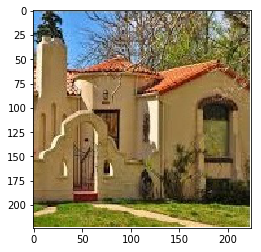

In [65]:
image_path = os.path.join("spanish_test", "spanish_0.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [81]:
d = image.img_to_array(img)
d.shape
xdata = []
xdata.append(d)
xdata.append(d)
xdata.append(d)
xdata.append(d)
x_data = np.array(xdata)
x_data.shape

ydata = []
ydata.append(1)
ydata.append(1)
ydata.append(1)
ydata.append(1)
y_data = np.array(ydata)
y_data.shape

(4,)

In [83]:
one_hot_y_data = to_categorical(y_data,3)
one_hot_y_data

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x = train_y= np.asarray(x)
x.shape

In [47]:
y_train = ["spanish","modern","tudor"]

In [48]:
from tensorflow.keras.utils import to_categorical

In [49]:
num_clas = 3
#y_train = to_categorical(y_train)

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
transfomed_label = label_encoder.transform(y_train)
print(transfomed_label)

[1 0 2]


In [63]:
ohe = to_categorical(transfomed_label)
ohe

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [52]:
#One hot encoding
one_hot_y = to_categorical(transfomed_label)
y_spanish = one_hot_y[1]
y_spanish

array([1., 0., 0.], dtype=float32)

In [53]:
model1.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [55]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
x.shape

(1, 224, 224, 3)

In [61]:
y_spanish

array([1., 0., 0.], dtype=float32)

In [57]:
# Fit (train) the model
model1.fit(
    x,
    y_spanish[1],
    epochs=1000,
    shuffle=True,
    verbose=2
)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'numpy.float32'>